In [154]:
#To install the FRED API
!pip install fredapi > /dev/null

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use('fivethirtyeight')
#This will allow to see 500 columns, by default 
pd.set_option('max_columns', 500)
#To get a color pallet to use in our plots
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']

from fredapi import Fred

#To load my FRED API as a secret
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
my_fred_key = user_secrets.get_secret("fred-api")

# Step 1 : Creating the FRED object
This will allow us to pull out all the data

In [156]:
fred = Fred(api_key=my_fred_key)

# Step 2 : Searching for Data

In [157]:
sp_search = fred.search('S&P', order_by = 'popularity')

S&P stands for Standard & Poor's, which is a financial services company that provides market intelligence, credit ratings, and indices for various financial markets. One of the most widely recognized S&P indices is the S&P 500, which is a stock market index that tracks the performance of 500 large companies listed on the stock exchanges in the United States. The S&P 500 is often used as a benchmark for the overall performance of the US stock market.

In [158]:
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2023-03-02,2023-03-02,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2023-03-01,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-03-02 08:54:08-06:00,94,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2023-03-02,2023-03-02,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2022-12-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-02-28 08:02:02-06:00,92,"For more information regarding the index, plea..."
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2023-03-02,2023-03-02,ICE BofA US High Yield Index Effective Yield,1996-12-31,2023-03-01,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-03-02 08:54:11-06:00,84,This data represents the effective yield of th...
SP500,SP500,2023-03-02,2023-03-02,S&P 500,2013-03-04,2023-03-01,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-03-01 19:10:48-06:00,84,The observations for the S&P 500 represent the...
CSUSHPISA,CSUSHPISA,2023-03-02,2023-03-02,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2022-12-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Seasonally Adjusted,SA,2023-02-28 08:02:04-06:00,83,"For more information regarding the index, plea..."


# Step 3 : Pulling & Ploting Raw Data

In [159]:
sp500 = fred.get_series(series_id = 'SP500')

<AxesSubplot:title={'center':'S & P 500'}>

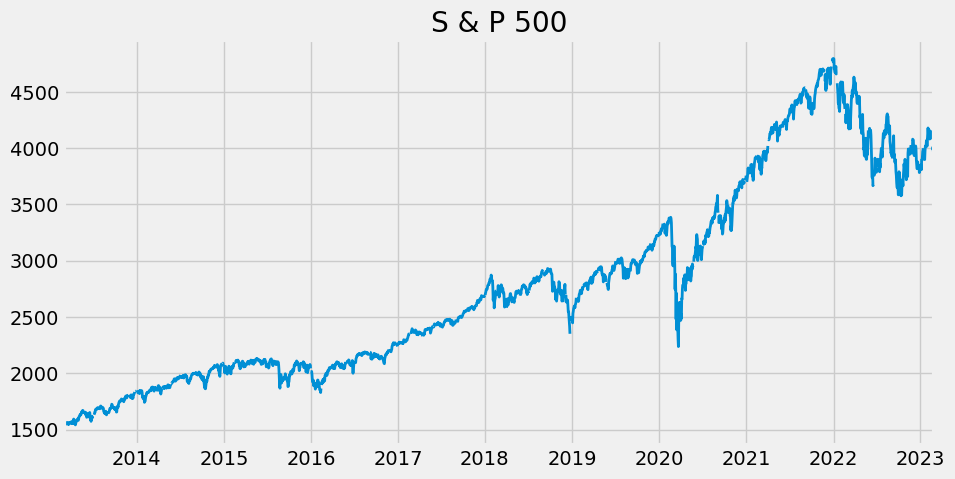

In [160]:
sp500.plot(figsize=(10, 5), title = 'S & P 500', lw=2)

# Step 4 : Pulling & Joining Multiple Data Series

In [161]:
unemp_results =fred.search('Canada Unemployment Rate')

In [162]:
unemp_results

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
LRUNTTTTCAM156S,LRUNTTTTCAM156S,2023-03-02,2023-03-02,Unemployment Rate: Aged 15 and over: All Perso...,1960-01-01,2022-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-01-13 11:50:22-06:00,47,OECD descriptor ID: LRUNTTTT OECD unit ID: STS...
LRUNTTTTCAQ156S,LRUNTTTTCAQ156S,2023-03-02,2023-03-02,Unemployment Rate: Aged 15 and over: All Perso...,1960-01-01,2022-10-01,Quarterly,Q,Percent,%,Seasonally Adjusted,SA,2023-01-13 11:18:02-06:00,17,OECD descriptor ID: LRUNTTTT OECD unit ID: STS...
LRUNTTTTCAA156N,LRUNTTTTCAA156N,2023-03-02,2023-03-02,Unemployment Rate: Aged 15 and over: All Perso...,1960-01-01,2022-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2023-01-13 11:36:03-06:00,11,OECD descriptor ID: LRUNTTTT OECD unit ID: ST ...
LRUNTTTTCAA156S,LRUNTTTTCAA156S,2023-03-02,2023-03-02,Unemployment Rate: Aged 15 and over: All Perso...,1960-01-01,2022-01-01,Annual,A,Percent,%,Seasonally Adjusted,SA,2023-01-13 11:36:03-06:00,10,OECD descriptor ID: LRUNTTTT OECD unit ID: STS...
LRUNTTTTCAM156N,LRUNTTTTCAM156N,2023-03-02,2023-03-02,Unemployment Rate: Aged 15 and over: All Perso...,1960-01-01,2022-12-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-01-13 11:50:22-06:00,5,OECD descriptor ID: LRUNTTTT OECD unit ID: ST ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CANURFEMQDSMEI,CANURFEMQDSMEI,2023-03-02,2023-03-02,Unemployment Level: Survey-Based (Females) in ...,1956-01-01,2012-01-01,Quarterly,Q,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2012-08-02 15:44:36-05:00,0,"Copyright, 2016, OECD. Reprinted with permissi..."
CANURMALEQDSMEI,CANURMALEQDSMEI,2023-03-02,2023-03-02,Unemployment Level: Survey-Based (Males) in Ca...,1956-01-01,2012-01-01,Quarterly,Q,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2012-08-02 15:45:09-05:00,0,"Copyright, 2016, OECD. Reprinted with permissi..."
CANURTOTQDSMEI,CANURTOTQDSMEI,2023-03-02,2023-03-02,Unemployment Level: Survey-Based (All Persons)...,1955-01-01,2012-01-01,Quarterly,Q,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2012-08-02 15:48:02-05:00,0,"Copyright, 2016, OECD. Reprinted with permissi..."


In [163]:
unrate = fred.get_series('LRUNTTTTCAQ156S')
unrate

1955-01-01         NaN
1955-04-01         NaN
1955-07-01         NaN
1955-10-01         NaN
1956-01-01         NaN
                ...   
2021-10-01    6.300000
2022-01-01    5.766667
2022-04-01    5.066667
2022-07-01    5.166667
2022-10-01    5.100000
Length: 272, dtype: float64

<AxesSubplot:title={'center':'Unemployment Rate in Canada'}>

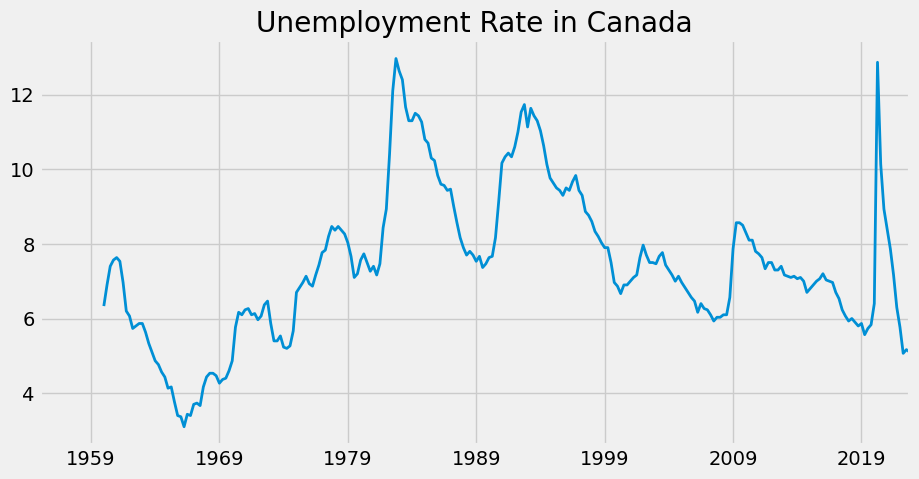

In [164]:
unrate.plot(figsize=(10, 5), title = 'Unemployment Rate in Canada', lw=2)

In [181]:
px.line(unrate)

## Numbers of Unemployed Males and Females In canada Based on Surveys

In [165]:
unemp_df =fred.search('Canada Unemployment Rate', filter=('frequency', 'Monthly'))
unemp_df=unemp_df.loc[unemp_df['title'].str.contains('Unemployment Level')]
unemp_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CANURFEMMDSMEI,CANURFEMMDSMEI,2023-03-02,2023-03-02,Unemployment Level: Survey-Based (Females) in ...,1956-01-01,2012-04-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2012-08-02 15:46:52-05:00,1,"Copyright, 2016, OECD. Reprinted with permissi..."
CANURMALEMDSMEI,CANURMALEMDSMEI,2023-03-02,2023-03-02,Unemployment Level: Survey-Based (Males) in Ca...,1956-01-01,2012-04-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2012-08-02 15:40:08-05:00,1,"Copyright, 2016, OECD. Reprinted with permissi..."
CANURTOTMDSMEI,CANURTOTMDSMEI,2023-03-02,2023-03-02,Unemployment Level: Survey-Based (All Persons)...,1955-01-01,2012-04-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2012-08-02 15:44:04-05:00,1,"Copyright, 2016, OECD. Reprinted with permissi..."


,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,


In [166]:
# Creating an empty list that will store all ids from each series
all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results.to_frame(name = myid)
    all_results.append(results)
results

1955-01-01     265.0
1955-02-01     260.0
1955-03-01     271.0
1955-04-01     252.0
1955-05-01     250.0
               ...  
2011-12-01    1399.8
2012-01-01    1421.2
2012-02-01    1386.2
2012-03-01    1356.2
2012-04-01    1370.6
Length: 688, dtype: float64

In [167]:
all_resultspd = pd.concat(all_results, axis = 1)
# Now to drop last raw which is based. on survey for all persons
all_resultspd = pd.concat(all_results, axis = 1).drop([2], axis = 1)
all_resultspd = all_resultspd.dropna()
all_resultspd

,0,1
1956-01-01,26.0717,188.2423
1956-02-01,31.1501,190.1220
1956-03-01,25.1461,180.2239
1956-04-01,25.5639,177.2424
1956-05-01,27.3585,171.0870
...,...,...
2011-12-01,613.7000,786.1000
2012-01-01,632.8000,788.4000
2012-02-01,622.7000,763.5000
2012-03-01,598.8000,757.4000


In [168]:
px.line(all_resultspd)